In [1]:
import pandas as pd

#使用pandas读取元数据
data = pd.read_csv(filepath_or_buffer="../data/data2.csv").to_numpy()

In [2]:

import numpy as np
from paddle.io import Dataset
import paddle
import warnings 

warnings.filterwarnings("ignore")
print(paddle.__version__)


2.3.0


In [3]:
class LinearNet(paddle.nn.Layer):
    def __init__(self):
        super().__init__()
        # 定义一个单层的输入维度为一输出维度为一的网络
        self.fc = paddle.nn.Linear(in_features=2,out_features=1)

    def forward(self,input):
        # 处理输入的一维数据
        pred = self.fc(input)
        return pred

In [4]:
class LinearDataset(Dataset):
    def __init__(self,data: np.ndarray) -> None:
        super().__init__()
        self.data = data
    
    def __getitem__(self, idx):
        # 读取每一批次中输入与输出
        # 并以np的数组的格式返回
        x_y = self.data[idx][0:2]
        z = self.data[idx][2]
        x_y = np.array([x_y],dtype="float32")
        z = np.array([z],dtype="float32")
        return x_y,z
       

    def __len__(self):
        return self.data.shape[0]

In [5]:
train = LinearDataset(data=data)

In [6]:
# step3:训练模型
model = paddle.Model(LinearNet())
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()),
              paddle.nn.MSELoss())
model.summary((4,2))

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Linear-1           [[4, 2]]              [4, 1]               3       
Total params: 3
Trainable params: 3
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
---------------------------------------------------------------------------



{'total_params': 3, 'trainable_params': 3}

In [7]:
model.fit(train_data=train, epochs=100, batch_size=1, verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/100
step 100/100 [==============================] - loss: 1215927.5000 - 2ms/step          
Epoch 2/100
step 100/100 [==============================] - loss: 949507.0000 - 2ms/step           
Epoch 3/100
step 100/100 [==============================] - loss: 997609.1250 - 2ms/step           
Epoch 4/100
step 100/100 [==============================] - loss: 563698.6250 - 2ms/step           
Epoch 5/100
step 100/100 [==============================] - loss: 1082679.8750 - 3ms/step          
Epoch 6/100
step 100/100 [==============================] - loss: 3026977.2500 - 2ms/step         
Epoch 7/100
step 100/100 [==============================] - loss: 265970.3125 - 2ms/step           
Epoch 8/100
step 100/100 [==============================] - loss: 975782.5625 - 2ms/step           
Epoch 9/100
step 100/100 [==============================] - loss: 1481512.7500 - 2ms/step  

In [8]:
trial_data = np.random.random(size=(1000,2)).astype(np.float32)*10
a = model.predict_batch([trial_data])

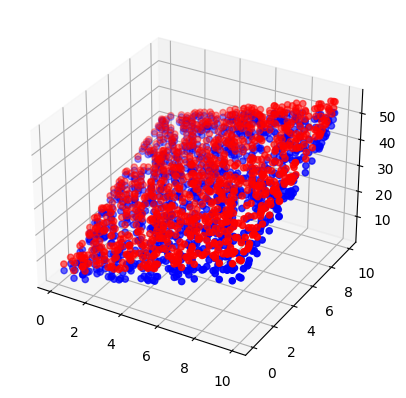

In [9]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
x = trial_data.T[0]
y = trial_data.T[1]
z = a[0].T[0]
ax.scatter(x,y,z,color='red')
ax.scatter(x,y,2*x+3*y+2,color='blue')

# 2.3显示
plt.show()

In [18]:
import paddle
from paddle.vision.models import LeNet

model = LeNet()

x = paddle.rand([1,1,28,28])
out = model(x)

print(out.shape)


[1, 10]
